**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

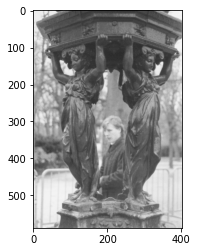

In [21]:
# code here

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


In [22]:
def convolution(image, kernel):
    # Obter as dimensões da imagem de entrada e do kernel
    altura_imagem, largura_imagem = image.shape
    altura_kernel, largura_kernel = kernel.shape

    # Calcular o preenchimento necessário para a imagem de saída
    pad_altura = altura_kernel // 2
    pad_largura = largura_kernel // 2

    # Inicializar uma imagem de saída vazia
    output_image = np.zeros_like(image, dtype=np.float32)

    # Realizar a convolução
    for y in range(altura_imagem):
        for x in range(largura_imagem):
            # Extrair a região de interesse 
            out = image[max(0, y - pad_altura):min(altura_imagem, y + pad_altura + 1),
                        max(0, x - pad_largura):min(largura_imagem, x + pad_largura + 1)]

            if out.shape == kernel.shape:
                # Multiplicação e soma elemento a elemento
                output_image[y, x] = np.sum(out * kernel)

    return output_image.astype(np.uint8)

In [23]:
def mean_filter(image, kernel_size, conv=None, flip=True):
    # Cria uma matrix de 1/kernel_size**2
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size**2)
    print('kernel:\n',kernel)
    if flip:
        kernel = np.flipud(np.fliplr(kernel)) # 180
    #print(kernel)    
    if conv == None:
        # Convolução usando a função filter2D
        output_image = cv2.filter2D(image, -1, kernel)
    else:
        output_image = conv(image, kernel)

    return output_image

# kernel 3
output_image = mean_filter(img1, 3, conv=convolution)
# kernel 7
output_image = mean_filter(output_image, 7, conv=convolution)
# kernel 3
output_image = mean_filter(output_image, 3, conv=convolution)

kernel:
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
kernel:
 [[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]
kernel:
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


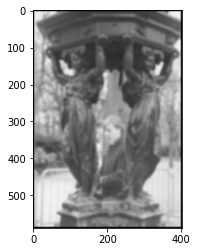

In [24]:
plt.imshow(output_image, cmap='gray', vmin=0, vmax=255);

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

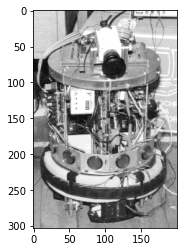

In [25]:
#  code here
img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

In [43]:
def mascaraGaussiano(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(-((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    kernel /= np.sum(kernel)
    return kernel

In [44]:
mascaraGaussiano(3, 1.0)

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [45]:
def gaussian_filter(image, kernel_size, sigma, conv=None):
    # Cria o kernel gaussiano
    kernel = gaussian_kernel(kernel_size, sigma)
    
    if conv == None:
        output_image = cv2.filter2D(image, -1, kernel)
    else:
        output_image = conv(image, kernel)

    return output_image

def gaussian_kernel(kernel_size, sigma):
    # Calcula o centro do kernel
    center = kernel_size // 2
    
    # Inicializa o kernel gaussiano
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    
    # Preenche o kernel com os valores da distribuição gaussiana
    for x in range(kernel_size):
        for y in range(kernel_size):
            x_dist = x - center
            y_dist = y - center
            kernel[x, y] = np.exp(-(x_dist**2 / (2 * sigma**2) + y_dist**2 / (2 * sigma**2))) / (2 * np.pi * sigma * sigma)
    
    # Normaliza o kernel?
    #kernel /= np.sum(kernel)
    print(kernel)

    return kernel


In [46]:
kernel_size = 3
sigma = 1.0

# Aplica o filtro gaussiano à imagem
output_image = gaussian_filter(img2, kernel_size, sigma, convolution)

[[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


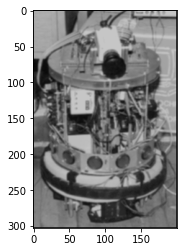

In [37]:
plt.imshow(output_image, cmap='gray', vmin=0, vmax=255);

In [38]:
kernel_size = 9
sigma = 2.0

# Aplica o filtro gaussiano à imagem
output_image = gaussian_filter(img2, kernel_size, sigma, convolution)

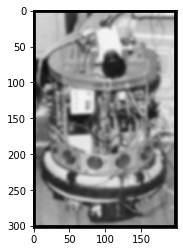

In [39]:
plt.imshow(output_image, cmap='gray', vmin=0, vmax=255);

In [40]:
kernel_size = 15
sigma = 4.0

# Aplica o filtro gaussiano à imagem
output_image = gaussian_filter(img2, kernel_size, sigma, convolution)

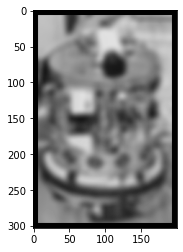

In [41]:
plt.imshow(output_image, cmap='gray', vmin=0, vmax=255);

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

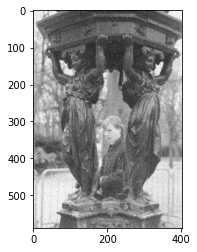

In [14]:
#  code here
img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255);

In [15]:
def median_filter(image, kernel_size):
    # Obtém as dimensões da imagem de entrada (altura e largura)
    height, width = image.shape[:2]

    # Inicializa uma imagem de saída vazia do mesmo tamanho que a de entrada
    output_image = np.zeros((height, width), dtype=np.uint8)

    # Calcula o tamanho da metade do kernel
    center = kernel_size // 2

    # Percorre cada pixel na imagem de entrada
    for y in range(height):
        for x in range(width):
            # Obtém a vizinhança ao redor do pixel atual
            out = image[max(0, y - center):min(height, y + center + 1),
                                max(0, x - center):min(width, x + center + 1)]

            # Calcula o valor mediano da vizinhança e atribui à imagem de saída
            median_value = np.median(out)
            output_image[y, x] = median_value

    return output_image

In [16]:
kernel_size = 3
output_image = median_filter(img3, kernel_size)

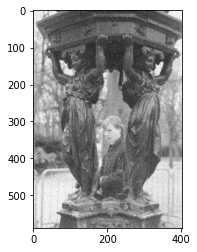

In [17]:
plt.imshow(img3, cmap='gray', vmin=0, vmax=255);

In [18]:
kernel_size = 7
output_image = median_filter(img3, kernel_size)

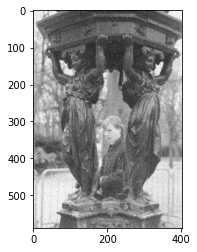

In [19]:
plt.imshow(img3, cmap='gray', vmin=0, vmax=255);